# **Ładny obrazek statku na początek**

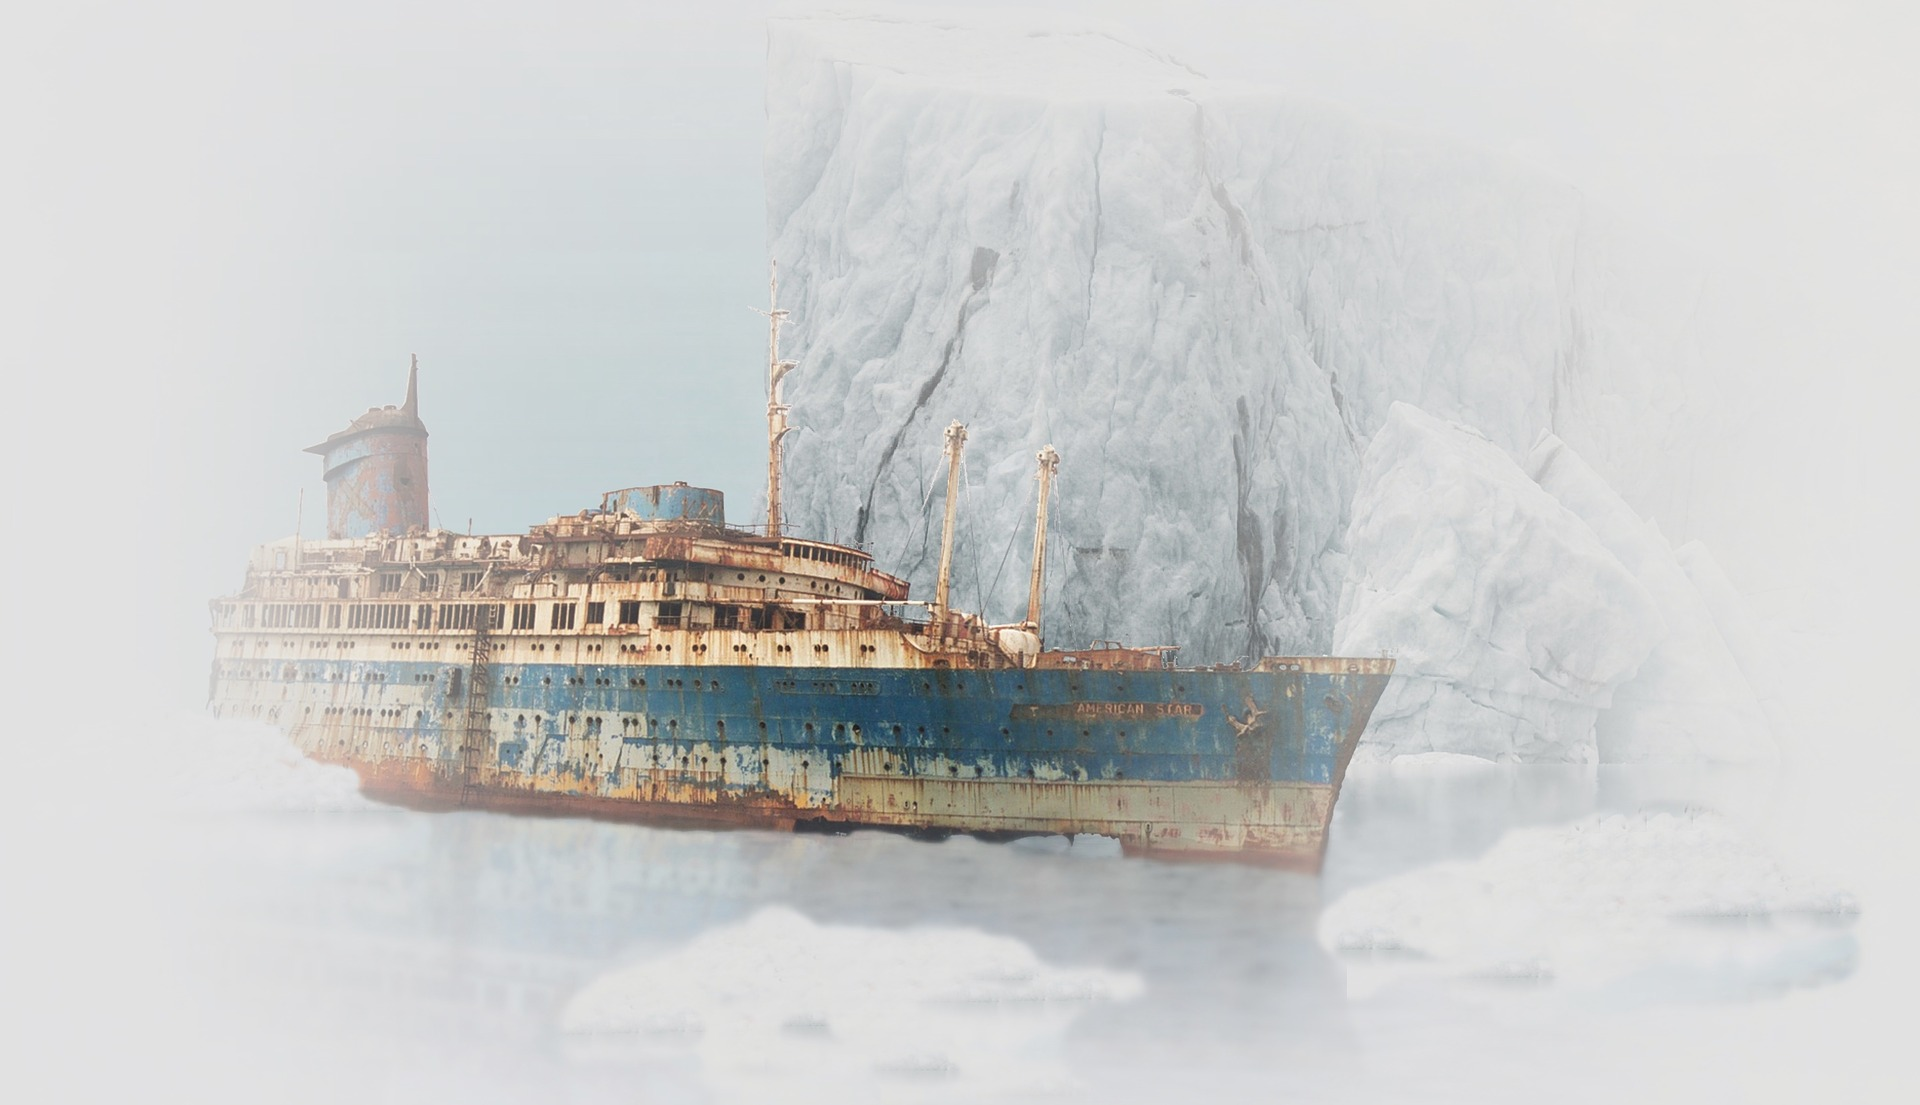

# Słowo wstępu

Titanic - jeden z najsłynniejszych statków w historii. Z nazwy kojarzy go w zasadzie każdy - znamiennie przyczynił się do tego film z Leo DiCaprio w roli głównej, a dla młodszej widowni - ilość memów, o tym jak biedny Jack (Leo) nie zmieścił się na kawałku drewna, na którym dryfowała Rose - w tej roli Kate Winslet (umówmy się, wszyscy wiemy, że by się zmieścił...). Mało osób jednak kojarzy, że Titanic był transatlantykiem i w trakcie katastrofy przepływał z Wielkiej Brytanii, dokładnie z Southampton do Nowego Jorku w Stanach Zjednoczonych. Owa felerna noc miała miejsce z 14 na 15 kwietnia 1912 roku - swoją drogą zastanawiałem się nad tym faktem i konia z rzędem temu kto mi powie, czy (A) jakby popłynęli np. w lipcu to tego czubka góry lodowej by nie było i nie pisałbym teraz tego co piszę albo czy (B) takie transatlantyki pływają obecnie w kwietniu. Bardziej zastanawia mnie (A), bo zapewne obecne statki mają tyle radarów, sond i możliwości sprawdzenia co jest na trasie, że większe szanse ma zwykły Kowalski na to, żeby przewrócić się przechodząc przez próg. No ale nie jestem ani biologiem, ani kapitanem statku, ale jestem tu od tego, żeby przeanalizować dane, także zajmijmy się właśnie tym.

# Istota problemu

Celem zadania jest przewidzieć czy dany pasażer Titanica zmarł czy przeżył, bazując na danych o tych właśnie pasażerach. Na drodze do napisania tej analizy najpierw podjąłem próbę zrobienia tej analizy nie patrząc w żaden inny z dostępnych zeszytów i uzyskałem wynik około 77%, czyli niewiele lepszy, niż jakby założyć, że po prostu wszystkie kobiety przeżyły (ok. 74%). Trzeba jednak przyznać, że poza wyczyszczeniem danych i dobraniem modelu, nie skupiałem się zupełnie na tzw. feature engineering, czyli zabawie ze zmiennymi, ani na dobraniu jak najlepszego modeli i tuningu hiperparametrów, chciałem po prostu zobaczyć jak Kaggle działa. Następnie przejrzałem dziesiątki rożnych zeszytów z różnymi metodami, które przyczyniły się do powstania tego zeszytu.

# Dostępne zmienne

W obu zbiorach danych - treningowym i testowym mamy dostępne zmienne jak poniżej:
* Survival	- 	0 = Nie przeżył, 1 = Przeżył
* Pclass	- 	Klasa biletu: 1 = 1sza klasa (wyższy pokład), 2 = 2ga klasa (po środku), 3 = 3cia klasa (niższe pokłady)
* Name      -   Imię i nazwisko wraz z tytułem
* Sex       -   Płeć
* Age	    -   Wiek w latach (jeżeli wiek jest poniżej 1 to podawany jest w ułamku. Jeżeli jest szacowany to podawany jest w formacie xx.5)
* Sibsp	    -   Liczba rodzeństwa/małżonków również na Titanicu (Rodzeństwo definiowane jako brat, siostra oraz przybrani bracia i siostry, a małżeństwo jako mąż i żona, kochanki i narzeczeństwo ignorowane)	
* Parch	    -   Liczba dzieci/rodziców również na Titanicu	(Rodzic = matka, ojciec / Dziecko = syn, córka, przybrani synowie i córki / Niektóre dzieci podróżowały tylko z nianią, więc ta zmienna jest dla nich równa 0)
* Ticket	-   Numer biletu	
* Fare	    -   Opłata za przepływ
* Cabin	    -   Numer kabiny
* Embarked	-   Port w którym danym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton)

# Ładowanie bibliotek

In [1]:
#Potrzebne biblioteki
import numpy as np 
import pandas as pd

%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

# Czas na Exploratory Data Analysis

Na początku należy załadować dane treningowe i testowe:

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv("../input/titanic/test.csv")

Następnie czas na metode HSDDI (lub jak kto woli SHIDD'), czyli sprawdzenie naszych danych (head, shape, dtypes, describe, isnull). Head pokazuje nam domyślnie 5 pierwszych wierszy naszej ramki danych:

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Jak widać dane testowe nie mają kolumny Survived, czyli wartości, którą nasz model ma przewidzieć. Shape określa rozmiar naszych ramek:

In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


Ilość kolumn zgadza się z tym co zobaczyliśmy w headzie, dane testowe to mniej więcej 30% całego zbioru. Dtypes sprawdza typ danych w naszej ramce:

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Wśród zmiennych numerycznych mamy 5 zmiennych obiektowych, z czego Sex i Embarked to dane kategoryczne (płeć to albo kobieta albo mężczyzna, porty są 3 jak widzieliśmy wcześniej). Kolejną metodą jest describe, żeby sprawdzić podstawowe mierniki danych numerycznych:

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Describe mówi wiele rzeczy o niektórych kolumnach np. średnia klas pasażerów w zbiorze treningowym to 2.3, czyli więcej było ludzi podróżujących w najgorszej, trzeciej klasie. Z kolumny Age możemy też zobaczyć, że najmłodsza osoba to dziecko, poniżej 0.5 roku życia, a najstarsza osoba miała 80 lat. W kolumnie Sibsp maksymalna liczba to aż 8. Następnie sprawdźmy ile jest brakujących wartości w każdym z zestawów:

In [8]:
train_null = train.isnull().sum().sort_values(ascending=False)
train_null

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [9]:
test_null = test.isnull().sum().sort_values(ascending=False)
test_null

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

Brakujące dane są głównie w kolumnach Cabin i Age - to może determinować czy zmienną Cabin będziemy w ogóle używać w czasie naszej analizy.
Po pierwszym zapoznaniu się z danymi i zmiennymi trzeba sobie zadać kilka pytań, co chcemy sprawdzić. Mnie interesuje na przykład na sam początek jak przeżywalność zależy od płci, klasy w, której pasażerowie płynęli, wieku, portu, w którym wsiedli na pokład czy ilości osób w rodzinie.

In [10]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


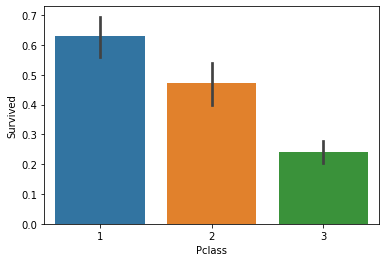

In [11]:
sns.barplot( x="Pclass",y="Survived", data=train)
plt.show()

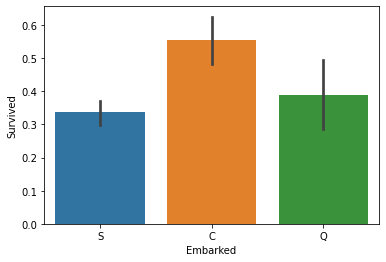

In [12]:
sns.barplot( x="Embarked",y="Survived", data=train)
plt.show()

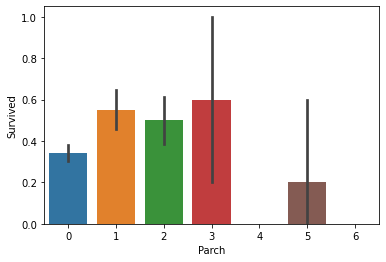

In [13]:
sns.barplot( x="Parch",y="Survived", data=train)
plt.show()

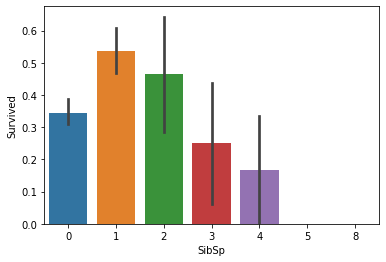

In [14]:
sns.barplot( x="SibSp",y="Survived", data=train)
plt.show()

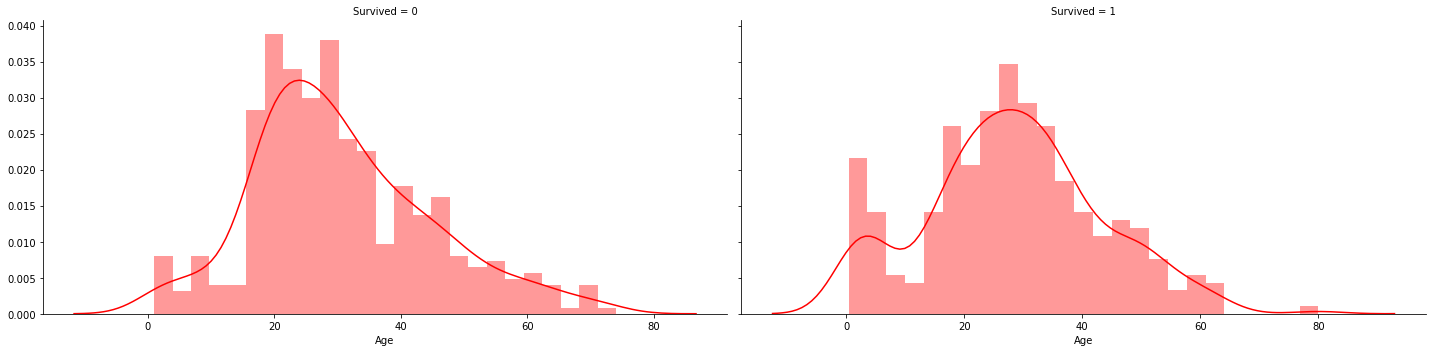

In [15]:
g = sns.FacetGrid(train, col='Survived', height=5, aspect=2, sharex='none')
g = g.map(sns.distplot, "Age", bins=25, color='r')

Po wstępnej analizie można już powiedzieć kilka rzeczy:
* Dużo kobiet i mało mężczyzn przeżyło katastrofę w danych treningowych
* Najwięcej osób przeżyło z klasy pierwszej, najmniej z trzeciej (co jest dosyć logiczne, zapewne ludzie w klasie pierwszej mieli kabiny gdzieś na górze statku z dobrym widokiem = bliżej do szalup ratunkowych)
* Najwięcej osób, które przeżyły, wsiadło w Cherbourg
* Rodziny wieloosobowe powyżej 4,5 osób w większości zginęły
* Patrząc na wiek osób, które przeżyły widać peak dla dzieci i niemowląt, natomiast osoby powyżej 60 roku życia raczej nie przeżywały

Dane można też połączyć:

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


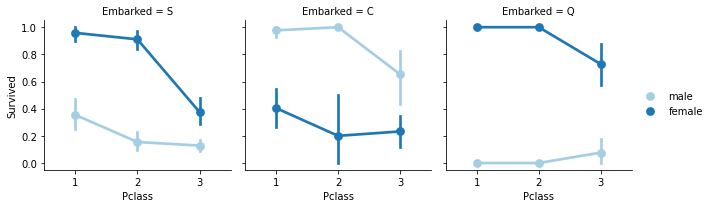

In [16]:
add_1 = sns.FacetGrid(train, col = 'Embarked')
add_1.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'Paired')
add_1.add_legend()

Z analizy powyższego wykresu wysnuwają się następujące wnioski - wszystkie kobiety z 1 i 2 klasy wsiadające w porcie w Queenstown przeżyły, a co ciekawe wszyscy mężczyźni z 1 i 2 klasy z tego portu zginęli. Przeżywalność mężczyzn wsiadających w porcie w Cherbourg jest znacznie większa od przeżywalności kobiet - jest to o tyle interesujące, że z poprzednich analiz wiemy, że mężczyzn w zbiorze treningowym przeżyło tylko ok. 18% (wychodzi więc na to, że większość wsiadała w Cherbourgu).

# Obróbka danych i feature engineering

# Embarked

Zaczniemy od zmiennej Embarked, gdzie mamy 2 brakujące wartości w zbiorze treningowym, a wszystkie zmienne w obu zbiorach są kategoryczne. Możemy podejrzeć te 2 wartości, bo mogły podróżować z rodziną, wtedy wypełnienie portu byłoby łatwiejsze:

In [17]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Niestety nie podróżowały z żadną rodziną, ale podróżowały same ze sobą w jednej kabinie. Możemy to też zrobić w inny sposób - wypełnić najczęściej pojawiającą się wartością:

In [18]:
train[train['Sex'] == 'female'].groupby(['Embarked'])['Sex'].value_counts()

Embarked  Sex   
C         female     73
Q         female     36
S         female    203
Name: Sex, dtype: int64

In [19]:
frequent = 'S'
train['Embarked'] = train['Embarked'].fillna(frequent)

In [20]:
train[train['Sex'] == 'female'].groupby(['Embarked'])['Sex'].value_counts()

Embarked  Sex   
C         female     73
Q         female     36
S         female    205
Name: Sex, dtype: int64

Następnie możemy zamienić wartości na numeryczne:

In [21]:
traintest = [train, test]
for sth in traintest:
    sth['Embarked'] = sth['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2


# Sex

Póki co jedyne co zrobimy z płcią to zamiana na wartości numeryczne:

In [23]:
for sth in traintest:
    sth['Sex'] = sth['Sex'].map( {'male': 1, 'female': 0} ).astype(int)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


# Cabin

W kolumnie Cabin zarówno w zbiorze treningowym, jak i testowym ok. 70% to brakujące wartości. Przyjęcie tutaj brakującej wartości jako 0 (ktoś nie miał kabiny) jest według mnie nieprawdiłowe, bo możliwe, że ktoś miał kabinę, ale nie została ona wpisana, co zaburzy później działanie algorytmu uczącego. Kolumna Cabin poza tym powinna być silnie skorelowana z kolumną Pclass - jeżeli ktoś płynął w 1 klasie to miał kabinę, która była wyżej (bliżej łodzi ratunkowych). Z tego względu pozbędziemy się tej kolumny:

In [25]:
for sth in traintest:
    sth = sth.drop(['Cabin'], axis=1, inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


# Name

* Zerknijmy jeszcze raz na imię i nazwisko:

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


Widzimy, że w imieniu i nazwisku zawarty jest jeszcze tytuł, powyżej np. 'Mr', 'Mrs' i 'Miss', które zawierają również przy tym informację o płci danej osoby. Spróbujmy wyciągnąć wszystkie tytuły:

In [28]:
traintest = [train,test]
for sth in traintest:
    sth['Title'] = sth.Name.str.extract('([A-Za-z]+)\.', expand=False)
    # Powyższe wyrażenie wyłapie wszystkie tytuły poprzedzone kropką

print("Tytuły w testowym zbiorze danych")
print(' ')
print(test.Title.unique())
print(' ')
print("Tytuły w treningowym zbiorze danych")
print(' ')
print(train.Title.unique())

Tytuły w testowym zbiorze danych
 
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']
 
Tytuły w treningowym zbiorze danych
 
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,Mr


Powyższe tytuły możnaby zamknąć w 4 kategoriach: 'Mr', 'Mrs', 'Miss' (dziewczynki), 'Master' (chłopcy). Opcjonalnie można by też wszystkie inne tytuły zamknąć w osobnej kategorii.

In [30]:
for sth in traintest:
    sth['Title'] = sth['Title'].replace(['Ms','Lady', 'Countess','Dona'],'Mrs')
    sth['Title'] = sth['Title'].replace(['Mme','Mlle'], 'Miss')
    sth['Title'] = sth['Title'].replace(['Major', 'Sir', 'Jonkheer', 'Dr','Col','Don', 'Capt','Rev'],'Mr')
print(train.Title.unique())
print(test.Title.unique())

['Mr' 'Mrs' 'Miss' 'Master']
['Mr' 'Mrs' 'Miss' 'Master']


W tym momencie zmienna Name jest już niepotrzebna, więc możemy ja usunąć.

In [31]:
for sth in traintest:
    sth = sth.drop(['Name'], axis=1, inplace=True)
for sth in traintest:
    print(sth.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    1  22.0      1      0         A/5 21171   
1            2         1       1    0  38.0      1      0          PC 17599   
2            3         1       3    0  26.0      0      0  STON/O2. 3101282   
3            4         1       1    0  35.0      1      0            113803   
4            5         0       3    1  35.0      0      0            373450   

      Fare  Embarked Title  
0   7.2500         2    Mr  
1  71.2833         0   Mrs  
2   7.9250         2  Miss  
3  53.1000         2   Mrs  
4   8.0500         2    Mr  
   PassengerId  Pclass  Sex   Age  SibSp  Parch   Ticket     Fare  Embarked  \
0          892       3    1  34.5      0      0   330911   7.8292         1   
1          893       3    0  47.0      1      0   363272   7.0000         2   
2          894       2    1  62.0      0      0   240276   9.6875         1   
3          895       3    1  27.0  

Zmapujmy wartości zmiennych Title do cyfr, żebyśmy mogli później sprawdzić ich korelację:

In [32]:
train['Title'] = train['Title'].map({ 'Mr': 0 ,'Mrs':1, 'Miss':2 ,'Master':3})
test['Title'] = test['Title'].map({ 'Mr': 0 ,'Mrs':1, 'Miss':2 ,'Master':3})

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0,1
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2,2
3,4,1,1,0,35.0,1,0,113803,53.1000,2,1
4,5,0,3,1,35.0,0,0,373450,8.0500,2,0


# Age

Po pierwsze zmienna Age zawiera brakujące wartości, które należy wypełnić. Jest na to wiele sposobów, np. wypełnienie średnią lub medianą całego zbioru. Można jednak posłużyć się innymi zmiennymi. W tym przypadku logicznym wydawałoby sie wzięcie zmiennych Title i Pclass, jako, że w Title jest zawarta w pewien sposób informacja o wieku (Mr będzie starszy niż Master) tak samo jak w Pclass, gdzie osoby o wyższym statusie materialnym są z reguły starsze. Możemy jednak sprawdzić nasze przypuszczenia badając korelację między zmiennymi:

In [34]:
df_corr = train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Zmienna 1", "level_1": "Zmienna 2", 0: 'Wsp. korelacji'}, inplace=True)
df_corr[df_corr['Zmienna 1'] == 'Age']

,Zmienna 1,Zmienna 2,Wsp. korelacji
5,Age,Age,1.000000
19,Age,Title,0.439898
23,Age,Pclass,0.369226
30,Age,SibSp,0.308247
41,Age,Parch,0.189119
59,Age,Fare,0.096067
60,Age,Sex,0.093254
69,Age,Survived,0.077221
81,Age,PassengerId,0.036847
86,Age,Embarked,0.030394


In [35]:
df_corr = test.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Zmienna 1", "level_1": "Zmienna 2", 0: 'Wsp. korelacji'}, inplace=True)
df_corr[df_corr['Zmienna 1'] == 'Age']

,Zmienna 1,Zmienna 2,Wsp. korelacji
4,Age,Age,1.000000
14,Age,Pclass,0.492143
15,Age,Title,0.385504
17,Age,Fare,0.337932
34,Age,Embarked,0.175848
46,Age,SibSp,0.091587
51,Age,Parch,0.061249
63,Age,PassengerId,0.034102
80,Age,Sex,0.000013


Jak widać przypuszczenia były słuszne, możemy zatem uzupełnić brakujące dane w oparciu o te dwie zmienne np. medianą:

In [36]:
traintest = [train, test]
for sth in traintest:
 sth['Age'] = sth.groupby(['Pclass','Title'])['Age'].apply(lambda x: x.fillna(x.median()))

In [37]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [38]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Title          0
dtype: int64

Kolejnym krokiem jest kategoryzacja zmiennej Age, można wykorzystać do tego metodę pd.qcut:

In [39]:
pd.qcut(train['Age'], 5).value_counts()

(19.0, 26.0]     247
(0.419, 19.0]    201
(40.5, 80.0]     177
(30.0, 40.5]     175
(26.0, 30.0]      91
Name: Age, dtype: int64

In [40]:
for sth in traintest:
    sth['Age'] = sth['Age'].astype(int)
    sth.loc[sth['Age'] <= 19, 'Age'] = 0
    sth.loc[(sth['Age'] > 19) & (sth['Age'] <= 26), 'Age'] = 1
    sth.loc[(sth['Age'] > 26) & (sth['Age'] <= 30), 'Age'] = 2
    sth.loc[(sth['Age'] > 30) & (sth['Age'] <= 40.5), 'Age'] = 3
    sth.loc[(sth['Age'] > 40.5) & (sth['Age'] <= 80), 'Age'] = 4

In [41]:
test['Age'].value_counts()

1    154
4     85
0     65
2     58
3     56
Name: Age, dtype: int64

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,1,1,1,0,A/5 21171,7.2500,2,0
1,2,1,1,0,3,1,0,PC 17599,71.2833,0,1
2,3,1,3,0,1,0,0,STON/O2. 3101282,7.9250,2,2
3,4,1,1,0,3,1,0,113803,53.1000,2,1
4,5,0,3,1,3,0,0,373450,8.0500,2,0


# Ticket

Zmienna Ticket charakteryzuje się dość dużą losowością - nawet dla osób z jednej rodziny można zauważyć małe różnice w numerze biletu. Nie możemy tej zmiennej również w żaden sposób zaszeregować, więc jedyną rozsądną opcją wydaje się jej usunięcie:

In [43]:
for sth in traintest:
   sth = sth.drop(['Ticket'], axis=1, inplace=True)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,1,1,0,7.2500,2,0
1,2,1,1,0,3,1,0,71.2833,0,1
2,3,1,3,0,1,0,0,7.9250,2,2
3,4,1,1,0,3,1,0,53.1000,2,1
4,5,0,3,1,3,0,0,8.0500,2,0


# Fare

Pierwszą rzeczą jaką należy zrobić przy zmiennej Fare jest uzupełnienie brakującej wartości w zbiorze testowym - jako, że jest to jedynie jedna wartość, można ją uzupełnić medianą, w oparciu np. o klasę (ceny biletów w różnych klasach będą różne) i w oparciu o wielkość rodziny, jako, że zmienna Fare wydaje się być taka sama dla poszczególnych członków rodziny (odpowiednio większa, jeżeli rodzina jest duża):

In [45]:
median_fare = test.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
median_fare

7.7958

In [46]:
for sth in [test]:
    sth['Fare'] = sth['Fare'].fillna(median_fare)

In [47]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

Kolejnym krokiem jest, podobnie jak w przypadku zmiennej Age, kategoryzacja zmiennej Fare:

In [48]:
pd.qcut(train['Fare'], 5).value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

In [49]:
traintest = [train, test]
for sth in traintest:
    sth['Fare'] = sth['Fare'].astype(int)
    sth.loc[sth['Fare'] <= 7.854, 'Fare'] = 0
    sth.loc[(sth['Fare'] > 7.854) & (sth['Fare'] <= 10.5), 'Fare'] = 1
    sth.loc[(sth['Fare'] > 10.5) & (sth['Fare'] <= 21.679), 'Fare'] = 2
    sth.loc[(sth['Fare'] > 21.679) & (sth['Fare'] <= 39.688), 'Fare'] = 3
    sth.loc[(sth['Fare'] > 39.688) & (sth['Fare'] <= 513), 'Fare'] = 4

In [50]:
train['Fare'].value_counts()

0    241
3    180
4    176
2    171
1    123
Name: Fare, dtype: int64

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,1,1,0,0,2,0
1,2,1,1,0,3,1,0,4,0,1
2,3,1,3,0,1,0,0,0,2,2
3,4,1,1,0,3,1,0,4,2,1
4,5,0,3,1,3,0,0,1,2,0


# SibSp, Parch

Zmienne SibSp i Parch będziemy analizować razem, jako, że zawierają podobną informację, którą można zastąpić jedną zmienną - wielkością rodziny.

In [52]:
for sth in traintest:
    sth['FamSize'] = sth['SibSp'] + sth['Parch']+1

In [53]:
train[['FamSize', 'Survived']].groupby(['FamSize'], as_index=False).mean()

,FamSize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


Jak widać najmniejsze szanse przeżycia miały osoby podróżujące samotnie oraz rodziny powyżej 4 osób. Możemy więc skategoryzować zmienną FamSize:

In [54]:
for sth in traintest:
    sth.loc[(sth['FamSize'] ==1) , 'FamSize'] = 0
    sth.loc[(sth['FamSize'] ==2) , 'FamSize'] = 1
    sth.loc[(sth['FamSize'] ==3) , 'FamSize'] = 2
    sth.loc[(sth['FamSize'] ==4) , 'FamSize'] = 3
    sth.loc[(sth['FamSize'] >4) , 'FamSize'] = 4
    sth['FamSize']=sth['FamSize'].astype(int)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize
0,1,0,3,1,1,1,0,0,2,0,1
1,2,1,1,0,3,1,0,4,0,1,1
2,3,1,3,0,1,0,0,0,2,2,0
3,4,1,1,0,3,1,0,4,2,1,1
4,5,0,3,1,3,0,0,1,2,0,0


Na końcu zmienne trzeba przygotować do obróbki dla modeli:

In [56]:
X_train = train.drop(['Survived','PassengerId'], axis=1)
col=(X_train.columns)
y_train = train["Survived"]
X_test=test.drop(["PassengerId"], axis=1)

# Uczenie maszynowe

Pierwszą czynnością jest import odpowiednich bibliotek. Przetestowane zostaną różne modele, żeby sprawdzić, który da najlepszy efekt.

In [57]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
import xgboost as xgb
seed = 101

1) Pierwszym testowanym algorytmem będzie regresja logistyczna z tuningiem hiperparametrów z pomocą GridSearchCV:

In [58]:
logreg = LogisticRegression()

# Parametry do tuningu
params = [{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
           'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

# Tuning hiperparametrów z pomocą GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=seed)
lr_clf = GridSearchCV(logreg, params, cv=cv, n_jobs=-1)
lr_clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none']}])

Najlepsze parametry:

In [59]:
lr_clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

I najlepszy wynik:

In [60]:
acc_log = lr_clf.best_score_
acc_log

0.8120155671332622

In [61]:
lr_preds = lr_clf.predict(X_test)

2) Kolejnym algorytmem jest Naiwny klasyfikator Bayesa:

In [62]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
acc_gnb = gnb.score(X_train, y_train)
acc_gnb

0.8103254769921436

3) LDA

In [63]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_preds = lda.predict(X_test)
acc_lda = lda.score(X_train, y_train)
acc_lda

0.8159371492704826

4) KNN

In [64]:
knn = KNeighborsClassifier()

# Parameters to tune
params = [{'n_neighbors': range(1, 21),
           'p': [1, 2]}]

# Hyperparameter tuning using GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=seed)
knn_clf = GridSearchCV(knn, params, cv=cv, n_jobs=-1)
knn_clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': range(1, 21), 'p': [1, 2]}])

In [65]:
knn_clf.best_params_

{'n_neighbors': 20, 'p': 1}

In [66]:
acc_knn = knn_clf.best_score_
acc_knn

0.8158288870755132

In [67]:
knn_preds = knn_clf.predict(X_test)

5) SVM

In [68]:
svm = SVC(max_iter=10000)

# Parameters to tune
params = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
           'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

# Hyperparameter tuning using GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=seed)
svm_clf = GridSearchCV(svm, params, cv=cv, n_jobs=-1)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=SVC(max_iter=10000), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [69]:
svm_clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [70]:
acc_svm = svm_clf.best_score_
acc_svm

0.8304205636808739

In [71]:
svm_preds = svm_clf.predict(X_test)

6) Drzewa decyzyjne

In [72]:
dt = DecisionTreeClassifier(random_state=seed)

# Parameters to tune
params = [{'max_depth': [5, 7, 10, None],
           'min_samples_split': [2, 5, 10],
           'max_features': ['sqrt', 5, 7, 10]}]

# Hyperparameter tuning using GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=seed)
dt_clf = GridSearchCV(dt, params, cv=cv, n_jobs=-1)
dt_clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=DecisionTreeClassifier(random_state=101), n_jobs=-1,
             param_grid=[{'max_depth': [5, 7, 10, None],
                          'max_features': ['sqrt', 5, 7, 10],
                          'min_samples_split': [2, 5, 10]}])

In [73]:
dt_clf.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5}

In [74]:
acc_dt = dt_clf.best_score_
acc_dt

0.822908166467893

In [75]:
dt_preds = dt_clf.predict(X_test)

7) Algorytm lasów losowych

In [76]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf.score(X_train, y_train)
acc_rf = rf.score(X_train, y_train)
acc_rf

0.9046015712682379

8) XGBoost

In [77]:
xgboost = xgb.XGBClassifier(n_estimators=1000)
xgboost.fit(X_train, y_train)
xgb_pred = xgboost.predict(X_test)
xgboost.score(X_train, y_train)
acc_xgb = xgboost.score(X_train, y_train)
acc_xgb

0.9057239057239057

Na samym końcu sprawdzony został jeszcze Stacking Classifier, czyli klasyfikator zbiorczy - metamodel, który uczy się wag, które należy przypisać do prognoz każdego posiadanego modelu.

In [78]:
base_estimators = list()
base_estimators.append(('lda', lda))
base_estimators.append(('knn', knn_clf.best_estimator_))
base_estimators.append(('svm', svm_clf.best_estimator_))
base_estimators.append(('dt', dt_clf.best_estimator_))
base_estimators.append(('rf', rf))

# Stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression(), cv=5, n_jobs=-1)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lda', LinearDiscriminantAnalysis()),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=20, p=1)),
                               ('svm', SVC(C=1, max_iter=10000)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       max_features='sqrt',
                                                       min_samples_split=5,
                                                       random_state=101)),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [79]:
acc_stack = stacking_clf.score(X_train, y_train)
acc_stack

0.8686868686868687

In [80]:
stack_preds = stacking_clf.predict(X_test)

Poniżej zestawienie porównawcze wszystkich modeli:

In [81]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear Discriment Analysis', 
              'XGBoost', 'StackingClassifier', 
              'Decision Tree'],
    'Score': [acc_svm, acc_knn, acc_log, 
              acc_rf, acc_gnb, acc_lda, 
              acc_xgb, acc_stack, acc_dt]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,XGBoost,0.905724
3,Random Forest,0.904602
7,StackingClassifier,0.868687
0,Support Vector Machines,0.830421
8,Decision Tree,0.822908
5,Linear Discriment Analysis,0.815937
1,KNN,0.815829
2,Logistic Regression,0.812016
4,Naive Bayes,0.810325


Jak widać, najlepszy wynik osiągnął XGBoost. Gdy jednak faktycznie zatwierdziłem ten zeszyt, najlepszym algorytmem okazał się LDA, osiągając wynik ok. 78%. Jest to związane z tym, że dane testowe, na których sprawdzane są algorytmy, mogą cechować się innymi wzorcami, przez co dany model nie osiąga tak dużej dokładności predykcji, jak w przypadku zbioru treningowego.

In [82]:
#Pod 'gnb_pred' można podstawić predykcje z innych algorytmów
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': gnb_pred})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Żeby osiągnąć jeszcze wyższy wynik, można próbować przede wszystkim zbudować inne cechy, wykorzystać inne modele złożone, ulepszyć tuning hiperparametrów.